# TensorFlow教程

欢迎来到本周的编程作业。 到目前为止，你一直使用numpy来构建神经网络。现在，我们将引导你使用深度学习框架，该框架将使你可以更轻松地构建神经网络。TensorFlow，PaddlePaddle，Torch，Caffe，Keras等机器学习框架可以极大地加快你的机器学习开发速度。所有这些框架也都有很多文档，你应该随时阅读学习。在此笔记本中，你将学习在TensorFlow中执行以下操作：

    初始化变量
    创建自己的会话（session）
    训练算法
    实现神经网络

编程框架不仅可以缩短编码时间，而且有时还可以进行优化以加快代码速度。

## 1 探索Tensorflow库

首先，导入库：

In [39]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import tensorflow as tf1
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

现在，你已经导入了库，我们将引导你完成其不同的应用程序。你将从一个示例开始：计算一个训练数据的损失。

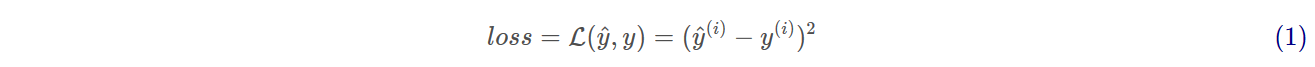

In [40]:
tf.disable_eager_execution()

y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9




在TensorFlow中编写和运行程序包含以下步骤：

    创建尚未执行的张量（变量）。
    在这些张量之间编写操作。
    初始化张量。
    创建一个会话。
    运行会话，这将运行你上面编写的操作。

因此，当我们为损失创建变量时，我们仅将损失定义为其他数量的函数，但没有验证其值。为了验证它，我们必须运行init = tf.global_variables_initializer（）初始化损失变量，在最后一行中，我们终于能够验证loss的值并打印它。

现在让我们看一个简单的例子。运行下面的单元格：


In [41]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


不出所料，看不到结果20！而是得到一个张量，是一个不具有shape属性且类型为“int32”的张量。你所做的所有操作都已放入“计算图”中，但你尚未运行此计算。为了实际将两个数字相乘，必须创建一个会话并运行它。

In [42]:
sess = tf.Session()
print(sess.run(c))

20




Great! 总而言之，记住要初始化变量，创建一个会话并在该会话中运行操作。

接下来，你还必须了解 placeholders(占位符)。占位符是一个对象，你只能稍后指定其值。
要为占位符指定值，你可以使用"feed dictionary"（feed_dict变量）传入值。在下面，我们为x创建了一个占位符，以允许我们稍后在运行会话时传递数字。


In [43]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6




当你首次定义x时，不必为其指定值。占位符只是一个变量，你在运行会话时才将数据分配给该变量。也就是说你在运行会话时向这些占位符“提供数据”。

当你指定计算所需的操作时，你在告诉TensorFlow如何构造计算图。计算图可以具有一些占位符，你将在稍后指定它们的值。最后，在运行会话时，你要告诉TensorFlow执行计算图。


### 1.1  线性函数

  让我们通过计算以下等式来开始编程：$Y=WX+b$ , $W$和$X$是随机矩阵，$b$是随机向量。
  
  我们计算$WX+b$，其中$W$，$X$和$b$是从随机正态分布中抽取的。$W$的维度是（4,3），$X$是（3,1），$b$是（4,1）。我们开始定义一个shape=（3,1）的常量$X$：

In [44]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)  
    X = tf.constant(np.random.randn(3,1), name = "X")  
    W = tf.constant(np.random.randn(4,3), name = "W")  
    b = tf.constant(np.random.randn(4,1), name = "b")  
    Y = tf.add(tf.matmul(W,X),b)  
    ### END CODE HERE ###   
      
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate  
      
    ### START CODE HERE ###  
    sess = tf.Session()  
    result = sess.run(Y)  
    ### END CODE HERE ###   
    
    # close the session 
    sess.close()

    return result

In [45]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


### 1.2 计算Sigmoid

Great！你刚刚实现了线性函数。Tensorflow提供了各种常用的神经网络函数，例如tf.sigmoid和tf.softmax。对于本练习，让我们计算输入的sigmoid函数值。

你将使用占位符变量x进行此练习。在运行会话时，应该使用feed字典传入输入z。在本练习中，你必须：
（i）创建一个占位符x；
（ii）使用tf.sigmoid定义计算Sigmoid所需的操作；
（iii）然后运行该会话

**练习**：实现下面的Sigmoid函数。你应该使用以下内容：

    tf.placeholder(tf.float32, name = "...")
    tf.sigmoid(...)
    sess.run(..., feed_dict = {x: z})

注意，在tensorflow中创建和使用会话有两种典型的方法：

**Method 1**:

**Method 2**:

In [46]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### START CODE HERE ### ( approx. 4 lines of code)  
    # Create a placeholder for x. Name it 'x'.  
    x = tf.placeholder(tf.float32, name = "x")  
  
    # compute sigmoid(x)  
    sigmoid = tf.sigmoid(x)  
  
    # Create a session, and run it. Please use the method 2 explained above.   
    # You should use a feed_dict to pass z's value to x.   
    with tf.Session() as sess:  
        # Run session and call the output "result"  
        result = sess.run(sigmoid,feed_dict={x:z})   #actually,the sigmoid here is equal to tf.sigmoid(x)
      
    ### END CODE HERE ###  
    
    return result

In [47]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999939


**总而言之，你知道如何**：

1.创建占位符

2.指定运算相对应的计算图

3.创建会话

4.如果需要指定占位符变量的值，使用feed字典运行会话。

### 1.3 计算损失

你还可以使用内置函数来计算神经网络的损失。

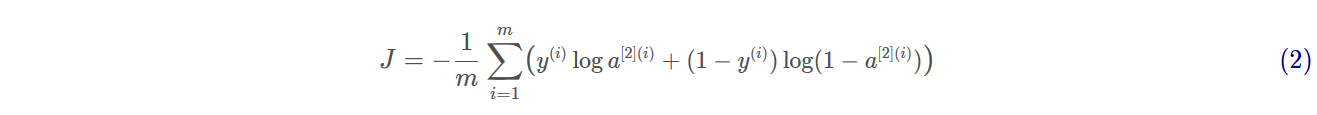

**练习**：实现交叉熵损失。你将使用的函数是：

    tf.nn.sigmoid_cross_entropy_with_logits(logits = ..., labels = ...)

你的代码应输入z，计算出sigmoid（得到a），然后计算出交叉熵损失，所有这些操作都可以通过调用tf.nn.sigmoid_cross_entropy_with_logits来完成。

In [48]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ###   
      
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)  
    z = tf.placeholder(tf.float32, name = "z")  
    y = tf.placeholder(tf.float32, name = "y")  
      
    # Use the loss function (approx. 1 line)  
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)  
      
    # Create a session (approx. 1 line). See method 1 above.  
    sess = tf.Session()  
      
    # Run the session (approx. 1 line).  
    cost = sess.run(cost,feed_dict={z:logits,y:labels})  
      
    # Close the session (approx. 1 line). See method 1 above.  
    sess.close()  
      
    ### END CODE HERE ###  
    
    return cost

In [49]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053873  1.0366408  0.41385436 0.39956617]


### 1.4 使用独热(One Hot)编码

在深度学习中，很多时候你会得到一个y向量，其数字范围从0到C-1，其中C是类的数量。例如C是4，那么你可能具有以下y向量，你将需要按以下方式对其进行转换：

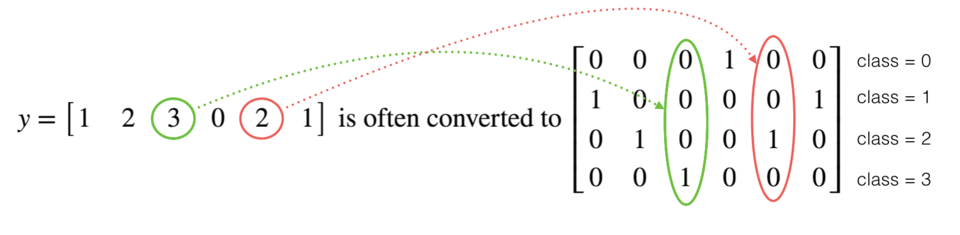

这称为独热编码，因为在转换后的表示形式中，每一列中的一个元素正好是“hot”（设为1）。要以numpy格式进行此转换，你可能需要编写几行代码。在tensorflow中，你可以只使用一行代码：

    tf.one_hot(labels, depth, axis)

**练习**：实现以下函数，以获取一个标签向量和C类的总数，并返回一个独热编码。使用tf.one_hot（）来做到这一点。

In [50]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###  
      
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)  
    C = tf.constant(C, name = "C")  
      
    # Use tf.one_hot, be careful with the axis (approx. 1 line)  
    one_hot_matrix = tf.one_hot(labels, C, axis=0)  
      
    # Create the session (approx. 1 line)  
    sess = tf.Session()  
      
    # Run the session (approx. 1 line)  
    one_hot = sess.run(one_hot_matrix)  
      
    # Close the session (approx. 1 line). See method 1 above.  
    sess.close()  
      
    ### END CODE HERE ###  
    
    return one_hot

In [51]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### 1.5  初始化为0和1

  现在我们将学习如何用0或者1初始化一个向量，我们要用到tf.ones()和tf.zeros()，给定这些函数一个维度值那么它们将会返回全是1或0的满足条件的向量/矩阵，我们来看看怎样实现它们：

In [52]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###  
      
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)  
    ones = tf.ones(shape)  
      
    # Create the session (approx. 1 line)  
    sess = tf.Session()  
      
    # Run the session to compute 'ones' (approx. 1 line)  
    ones = sess.run(ones)  
      
    # Close the session (approx. 1 line). See method 1 above.  
    sess.close()  
      
    ### END CODE HERE ###  
    return ones  

print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


## 2 使用Tensorflow构建你的第一个神经网络

在这一部分作业中，你将使用tensorflow构建神经网络。请记住，实现tensorflow模型包含两个部分：

    创建计算图
    运行计算图

让我们深入研究你要解决的问题！
### 2.0 问题陈述：SIGNS 数据集

一个下午，我们决定和一些朋友一起用计算机来解密手语。我们花了几个小时在白墙前拍照，并提出了以下数据集。现在，你的工作就是构建一种算法，以帮助语音障碍者和不懂手语的人的交流。

  **训练集**：1080张图片（64 x 64像素）的手势表示从0到5的数字（每个数字180张图片）。 
  
  **测试集**：120张图片（64 x 64像素）的手势表示从0到5的数字（每个数字20张图片）。

请注意，这是SIGNS数据集的子集。完整的数据集包含更多的手势。

这是每个数字的示例，以及如何解释标签的方式。这些是原始图片，然后我们将图像分辨率降低到64 x 64像素。

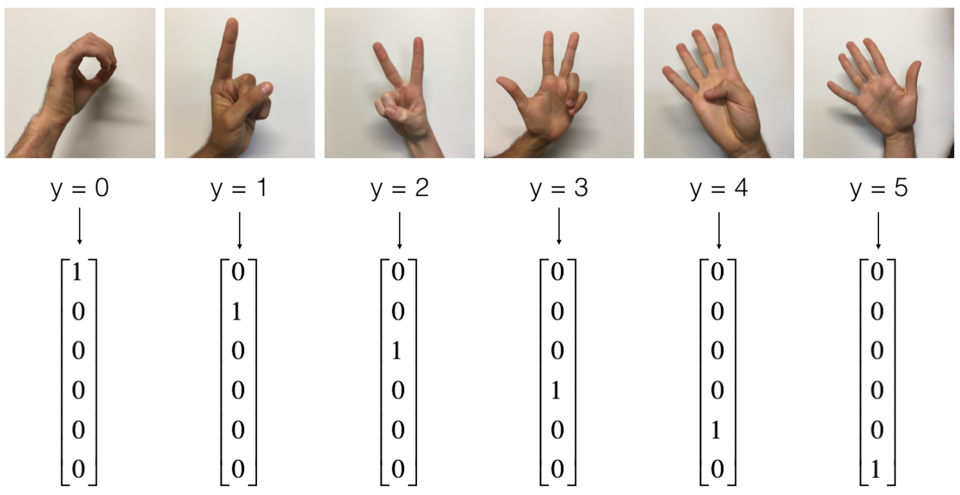

运行以下代码以加载数据集。

In [53]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

更改下面的索引并运行单元格以可视化数据集中的一些示例。

y = 5


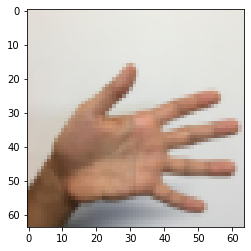

In [54]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

通常先将图像数据集展平，然后除以255以对其进行归一化。最重要的是将每个标签转换为一个独热向量，如图1所示。运行下面的单元格即可转化。

In [55]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


   我们的目标是构建能够高准确度识别符号的算法。 要做到这一点，你要建立一个TensorFlow模型，这个模型几乎和你之前在猫识别中使用的numpy一样（但现在使用softmax输出）。要将您的numpy实现与tensorflow实现进行比较的话这是一个很好的机会。

  目前的模型是：LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX，SIGMOID输出层已经转换为SOFTMAX。当有两个以上的类时，一个SOFTMAX层将SIGMOID一般化。


### 2.1 创建占位符

你的第一个任务是为X和Y创建占位符，方便你以后在运行会话时传递训练数据。

**练习**：实现以下函数以在tensorflow中创建占位符。


In [56]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)  
    X = tf.placeholder(shape=[n_x, None],dtype=tf.float32)  
    Y = tf.placeholder(shape=[n_y, None],dtype=tf.float32)  
    ### END CODE HERE ###  
    
    return X, Y

In [57]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(12288, None), dtype=float32)
Y = Tensor("Placeholder_3:0", shape=(6, None), dtype=float32)


### 2.2 初始化参数

你的第二个任务是初始化tensorflow中的参数。

**练习**：实现以下函数以初始化tensorflow中的参数。使用权重的Xavier初始化和偏差的零初始化。维度如下，对于W1和b1，你可以使用：

请使用seed = 1来确保你的结果与我们的结果相符。

In [58]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)  
    W1 = tf.get_variable("W1", [25,12288], initializer = tf1.initializers.GlorotUniform(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())  
    W2 = tf.get_variable("W2", [12,25], initializer = tf1.initializers.GlorotUniform(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())  
    W3 = tf.get_variable("W3", [6,12], initializer = tf1.initializers.GlorotUniform(seed = 1))  
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())  
    ### END CODE HERE ### 

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [59]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32>


如预期的那样，尚未对参数进行验证。


### 2.3 Tensorflow中的正向传播

你现在将在tensorflow中实现正向传播模块。该函数将接收参数字典，并将完成正向传递。你将使用的函数是：

    tf.add（...，...）进行加法
    tf.matmul（...，...）进行矩阵乘法
    tf.nn.relu（...）以应用ReLU激活

**问题**：实现神经网络的正向传递。我们为你注释了numpy等式，以便你可以将tensorflow实现与numpy实现进行比较。重要的是要注意，前向传播在z3处停止。原因是在tensorflow中，最后的线性层输出作为计算损失函数的输入。因此，你不需要a3！

In [60]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:  
    Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1  
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)  
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, a1) + b2  
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)  
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                              # Z3 = np.dot(W3,Z2) + b3  
    ### END CODE HERE ###  
    
    return Z3

In [119]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:  
    Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1  
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)  
    A1 = tf.nn.dropout(A1, keep_prob)
    
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, a1) + b2  
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)  
    A2 = tf.nn.dropout(A2, keep_prob)
    
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                              # Z3 = np.dot(W3,Z2) + b3  
    ### END CODE HERE ###  
    
    return Z3

In [61]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, None), dtype=float32)


你可能已经注意到，正向传播不会输出任何缓存。当我们开始进行传播时，你将在下面理解为什么。


### 2.4 计算损失

如前所述，使用以下方法很容易计算损失：

tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))

**问题**：实现以下损失函数。

    重要的是要知道tf.nn.softmax_cross_entropy_with_logits的"logits"和"labels"输入应具有一样的维度（数据数，类别数）。 因此，我们为你转换了Z3和Y。
    此外，tf.reduce_mean是对所以数据进行求和。



In [62]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)  
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))  
    ### END CODE HERE ###  
    
    return cost

In [91]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(Z3, Y, parameters, lambd):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - Tensor of the cost function
    """
    
    m = Y.shape[0]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)  
    cross_entropy_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    L2_regularization_cost = (1./m*lambd/2)*(tf.reduce_sum(np.square(W1)) + tf.reduce_sum(np.square(W2)) + tf.reduce_sum(np.square(W3)))
    cost = cross_entropy_cost + L2_regularization_cost
    ### END CODE HERE ###  
    
    return cost

In [64]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 反向传播和参数更新

所有反向传播和参数更新均可使用1行代码完成，将这部分合并到模型中非常容易。

计算损失函数之后，你将创建一个"optimizer"对象。运行tf.session时，必须与损失一起调用此对象。调用时，它将使用所选方法和学习率对给定的损失执行优化。

例如，对于梯度下降，优化器将是：

要进行优化，你可以执行以下操作：

通过相反顺序的tensorflow图来计算反向传播。从损失到输入。

注意编码时，我们经常使用_作为“throwaway”变量来存储以后不再需要使用的值。这里_代表了我们不需要的optimizer的评估值（而 c 代表了 cost变量的值）。


### 2.6 建立模型

现在，将它们组合在一起！

**练习**:调用之前实现的函数构建完整模型。


In [120]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, lambd = 0.7, keep_prob = 0.5,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)  
    X, Y = create_placeholders(n_x, n_y)  
    ### END CODE HERE ###  
  
    # Initialize parameters  
    ### START CODE HERE ### (1 line)  
    parameters = initialize_parameters()  
    ### END CODE HERE ###  
      
    # Forward propagation: Build the forward propagation in the tensorflow graph  
    ### START CODE HERE ### (1 line)  
    # Z3 = forward_propagation(X, parameters)  
    Z3 = forward_propagation_with_dropout(X, parameters, keep_prob)
    ### END CODE HERE ###  
      
    # Cost function: Add cost function to tensorflow graph  
    ### START CODE HERE ### (1 line)  
    ## cost = compute_cost(Z3, Y) 
    cost = compute_cost_with_regularization(Z3, Y, parameters, lambd)
    ### END CODE HERE ###  
      
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.  
    ### START CODE HERE ### (1 line)  
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)  
    ### END CODE HERE ###  
      
    # Initialize all the variables  
    init = tf.global_variables_initializer()  
  
    # Start the session to compute the tensorflow graph  
    with tf.Session() as sess:  
          
        # Run the initialization  
        sess.run(init)  
          
        # Do the training loop  
        for epoch in range(num_epochs):  
  
            epoch_cost = 0.                       # Defines a cost related to an epoch  
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set  
            seed = seed + 1  
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)  
  
            for minibatch in minibatches:  
  
                # Select a minibatch  
                (minibatch_X, minibatch_Y) = minibatch  
                  
                # IMPORTANT: The line that runs the graph on a minibatch.  
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).  
                ### START CODE HERE ### (1 line)  
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})  
                ### END CODE HERE ###  
                  
                epoch_cost += minibatch_cost / num_minibatches  
  
            # Print the cost every epoch  
            if print_cost == True and epoch % 100 == 0:  
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))  
            if print_cost == True and epoch % 5 == 0:  
                costs.append(epoch_cost)  
                  
        # plot the cost  
        plt.plot(np.squeeze(costs))  
        plt.ylabel('cost')  
        plt.xlabel('iterations (per tens)')  
        plt.title("Learning rate =" + str(learning_rate))  
        plt.show()  
  
        # lets save the parameters in a variable  
        parameters = sess.run(parameters)  
        print ("Parameters have been trained!")  
  
        # Calculate the correct predictions  
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))  
  
        # Calculate accuracy on the test set  
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))  
  
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))  
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))  
          
        return parameters  

Cost after epoch 0: 1.866523
Cost after epoch 100: 0.812711
Cost after epoch 200: 0.571792
Cost after epoch 300: 0.396519
Cost after epoch 400: 0.272928
Cost after epoch 500: 0.193333
Cost after epoch 600: 0.125910
Cost after epoch 700: 0.083817
Cost after epoch 800: 0.055906
Cost after epoch 900: 0.031871
Cost after epoch 1000: 0.022090
Cost after epoch 1100: 0.011795
Cost after epoch 1200: 0.008768
Cost after epoch 1300: 0.005532
Cost after epoch 1400: 0.003180


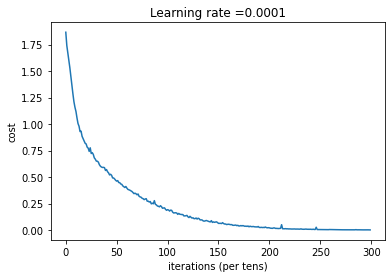

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.8666667


In [126]:
parameters = model(X_train, Y_train, X_test, Y_test, lambd = 0, keep_prob = 1)

Nice！你的算法可以识别出表示0到5之间数字的手势，准确度达到了86.7％。

**评价**：

    你的模型足够强大，可以很好地拟合训练集。但是，鉴于训练和测试精度之间的差异，你可以尝试添加L2或dropout正则化以减少过拟合。
    将会话视为训练模型的代码块。每次你在小批次上运行会话时，它都会训练参数。总的来说，你已经运行了该会话多次（1500个epoch），直到获得训练有素的参数为止。




**你应该记住**：

    Tensorflow是深度学习中经常使用的编程框架
    Tensorflow中的两个主要对象类别是张量和运算符。
    在Tensorflow中进行编码时，你必须执行以下步骤：
         - 创建一个包含张量（变量，占位符...）和操作（tf.matmul，tf.add，...）的计算图
         - 创建会话
         - 初始化会话
         - 运行会话以执行计算图
    你可以像在model（）中看到的那样多次执行计算图
    在“优化器”对象上运行会话时，将自动完成反向传播和优化。

